In [132]:
datapath_big = "/data/yutaro/IROS/sim_data_full_v13_d4_m1.mat"
datapath_small = "/data/yutaro/IROS/sim_data_partial_v13_d4_m1.mat"

In [133]:
import scipy.io as sio
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from matplotlib import animation
import pickle

In [134]:
small = sio.loadmat(datapath_small)

In [135]:
print(small.keys())

dict_keys(['__version__', '__globals__', '__header__', 'is_start', 'is_end', 'D'])


In [136]:
big = sio.loadmat(datapath_big)
print(big['D'].shape)

(411151, 10)


In [137]:
small['D'].shape

(6544, 10)

In [138]:
big['D'].shape

(411151, 10)

In [139]:
df_big = pd.DataFrame(big['D'])

In [140]:
print(np.min(big['D'][:,0]))
print(np.max(big['D'][:,0]))
print(np.min(big['D'][:,1]))
print(np.max(big['D'][:,1]))

-90.28448909521103
90.25212377309799
43.363094329833984
136.1563801765442


In [141]:
df_big.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.220820,117.741577,15.969999,15.969999,-1.0,-1.0,-0.200762,117.745787,15.939999,15.939999
1,-0.200762,117.745787,15.939999,15.939999,-1.0,-1.0,-0.184196,117.750466,15.909998,15.909998
2,-0.184196,117.750466,15.909998,15.909998,-1.0,-1.0,-0.169507,117.755398,15.879997,15.879997
3,-0.169507,117.755398,15.879997,15.879997,-1.0,-1.0,-0.156517,117.760427,15.849998,15.849998
4,-0.156517,117.760427,15.849998,15.849998,-1.0,-1.0,-0.144677,117.765442,15.819997,15.819997


In [11]:
print(np.max(big['D'][:,5])) 

1.0


In [125]:
with open("traj_list_big.pkl", "rb") as f:
    traj_list_big = pickle.load(f)

with open("traj_list_small.pkl", "rb") as f:
    traj_list_small = pickle.load(f)
    
with open("traj_ground_truth.pkl", "rb") as f:
    traj_ground_truth = pickle.load(f)

In [13]:
print(len(traj_list_big))

101


In [126]:
traj_list_big[0] = traj_list_big[0][0,:4] 

In [127]:
traj_list_small[0] = traj_list_small[0][0, :4]

In [16]:
traj_ground_truth.shape

(200, 6)

In [43]:
pd.DataFrame(traj_ground_truth).head(30)

,0,1,2,3,4,5
0,0.262081,0.622923,0.426745,0.550387,0.5,1.0
1,0.261339,0.621574,0.426745,0.551016,0.5,1.0
2,0.260612,0.620273,0.426745,0.551646,0.5,1.0
3,0.259859,0.618916,0.426745,0.552276,0.5,1.0
4,0.259128,0.617544,0.426745,0.552906,0.5,1.0
5,0.258372,0.616151,0.426745,0.553535,0.5,1.0
6,0.257617,0.614801,0.426745,0.554165,0.5,1.0
7,0.256847,0.613505,0.426745,0.554795,0.5,1.0
8,0.256105,0.612234,0.426745,0.555424,0.5,1.0
9,0.255419,0.611087,0.426745,0.556054,0.5,1.0


In [128]:
traj_truth_list = [] 
for i in range(101):
    traj_truth_list.append(traj_ground_truth[i,:4])

In [82]:
traj_truth_list[0]

array([0.26208117, 0.62292331, 0.42674515, 0.55038669])

In [114]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
import time

In [129]:
traj_list_big_reshaped = []
for i in range(len(traj_list_big)):
    traj_list_big_reshaped.append(traj_list_big[i].reshape(-1))

In [130]:
traj_list_small_reshaped = []
for i in range(len(traj_list_small)):
    traj_list_small_reshaped.append(traj_list_small[i].reshape(-1))

In [23]:
np.array(traj_list_big_reshaped).shape

(101, 4)

In [24]:
np.array(traj_truth_list)[0,0], np.array(traj_truth_list)[0,1] 

(0.2620811734814442, 0.6229233066633751)

In [25]:
np.array(traj_list_big_reshaped)[0,0], np.array(traj_list_big_reshaped)[0,1] 

(0.2620811734814442, 0.6229233066633751)

In [49]:
pd.DataFrame(traj_list_big_reshaped).head(10)

,0,1,2,3
0,0.262081,0.622923,0.426745,0.550387
1,0.262255,0.622846,0.426458,0.550041
2,0.262255,0.622846,0.426458,0.550041
3,0.262255,0.622846,0.426458,0.550041
4,0.262255,0.622846,0.426458,0.550041
5,0.262255,0.622846,0.426458,0.550041
6,0.262255,0.622846,0.426458,0.550041
7,0.262255,0.622846,0.426458,0.550041
8,0.262255,0.622846,0.426458,0.550041
9,0.262255,0.622846,0.426458,0.550041


In [34]:
print(np.max(np.array(traj_truth_list)[:,1]))
print(np.min(np.array(traj_truth_list)[:,1]))

print(np.max(np.array(traj_list_big_reshaped)[0:100,1]))
print(np.min(np.array(traj_list_big_reshaped)[0:100,1]))

0.6229233066633751
0.5715545577528298
0.63702242821455
0.6201297249644995


In [65]:
print(np.max(np.array(traj_truth_list)[:,1]))
print(np.min(np.array(traj_truth_list)[:,1]))

print(np.max(np.array(traj_list_big_reshaped)[0:100,1]))
print(np.min(np.array(traj_list_big_reshaped)[0:100,1]))

0.6229233066633751
0.5715545577528298
0.63702242821455
0.6201297249644995


In [35]:
np.array(traj_list_big_reshaped).shape

(101, 4)

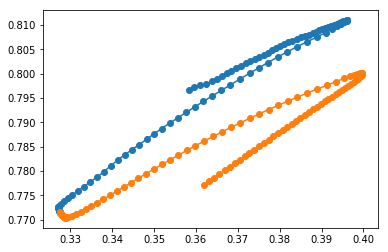

In [131]:
plot_num_size = 100
plt.plot(np.array(traj_truth_list)[:plot_num_size,0], np.array(traj_truth_list)[:plot_num_size,1], '-o')
plt.plot(np.array(traj_list_big_reshaped)[:plot_num_size,0], np.array(traj_list_big_reshaped)[:plot_num_size,1], '-o')
#plt.scatter(np.array(traj_list_small_reshaped)[:,0], np.array(traj_list_small_reshaped)[:,1], s=5)

plt.show()

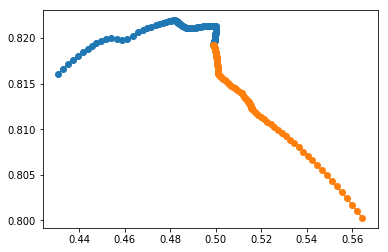

In [117]:
plot_num_size = 100
plt.plot(np.array(traj_truth_list)[:plot_num_size,0], np.array(traj_truth_list)[:plot_num_size,1], '-o')
plt.plot(np.array(traj_list_big_reshaped)[:plot_num_size,0], np.array(traj_list_big_reshaped)[:plot_num_size,1], '-o')
#plt.scatter(np.array(traj_list_small_reshaped)[:,0], np.array(traj_list_small_reshaped)[:,1], s=5)

plt.show()

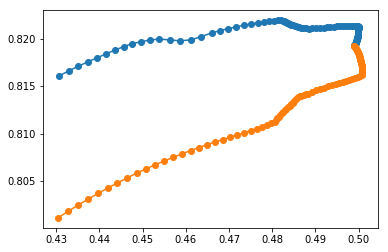

In [109]:
plot_num_size = 100
plt.plot(np.array(traj_truth_list)[:plot_num_size,0], np.array(traj_truth_list)[:plot_num_size,1], '-o')
plt.plot(np.array(traj_list_big_reshaped)[:plot_num_size,0], np.array(traj_list_big_reshaped)[:plot_num_size,1], '-o')
#plt.scatter(np.array(traj_list_small_reshaped)[:,0], np.array(traj_list_small_reshaped)[:,1], s=5)

plt.show()

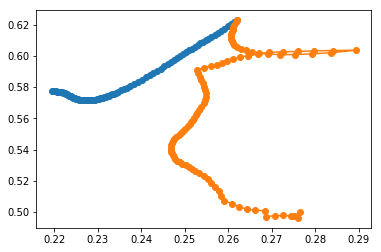

In [102]:
plot_num_size = 100
plt.plot(np.array(traj_truth_list)[:plot_num_size,0], np.array(traj_truth_list)[:plot_num_size,1], '-o')
plt.plot(np.array(traj_list_big_reshaped)[:plot_num_size,0], np.array(traj_list_big_reshaped)[:plot_num_size,1], '-o')
#plt.scatter(np.array(traj_list_small_reshaped)[:,0], np.array(traj_list_small_reshaped)[:,1], s=5)

plt.show()

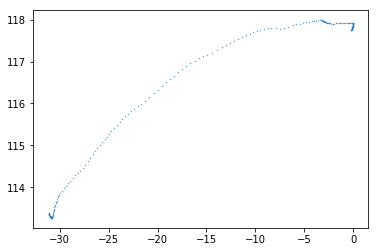

In [50]:
plt.scatter(big['D'][:200,0], big['D'][:200,1], s=0.1)
plt.show()

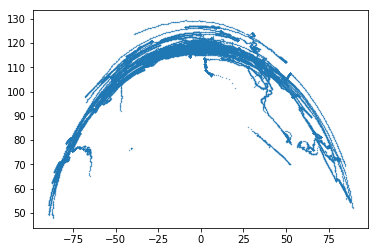

In [48]:
plt.scatter(big['D'][:40000,0], big['D'][:40000,1], s=0.1)
plt.show()

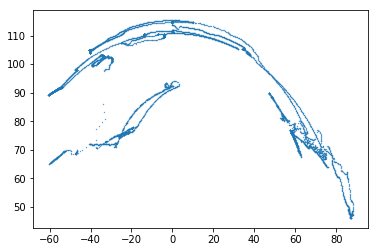

In [49]:
plt.scatter(small['D'][:6500,0], small['D'][:6500,1], s=0.1)
plt.show()

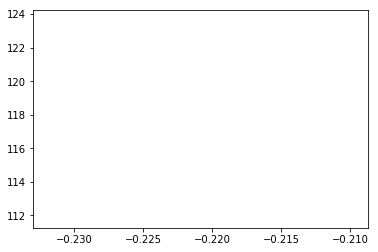

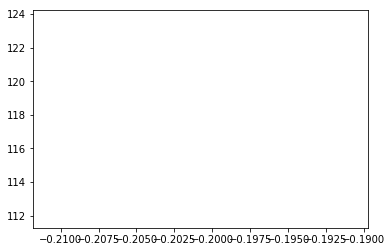

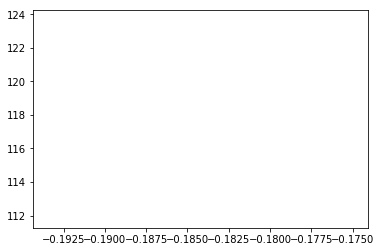

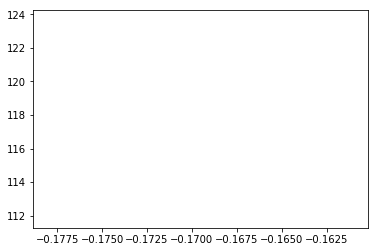

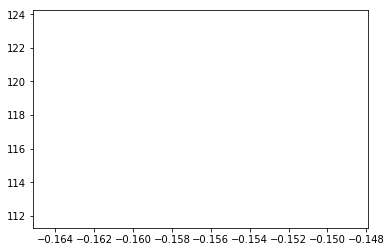

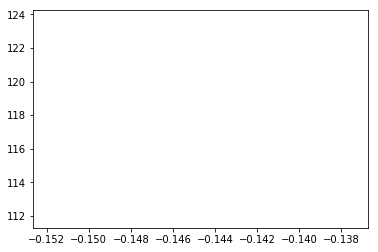

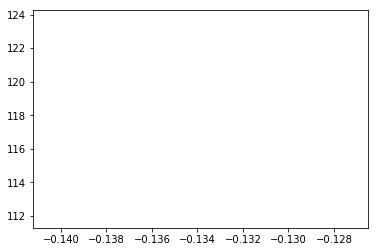

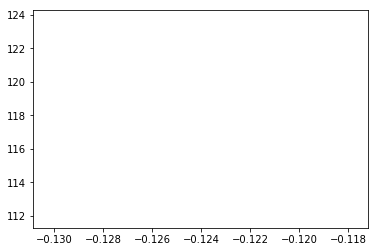

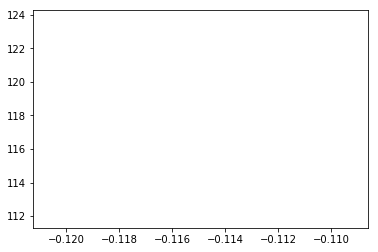

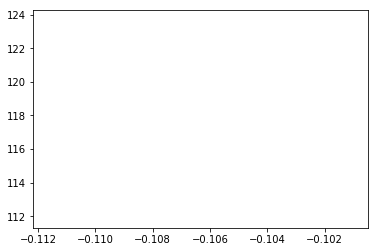

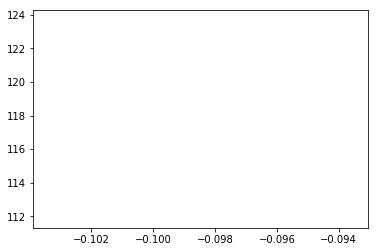

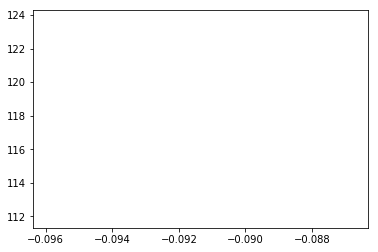

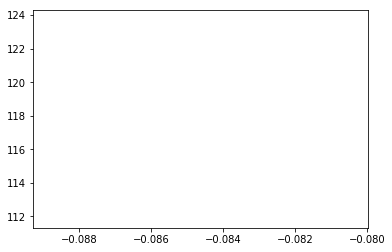

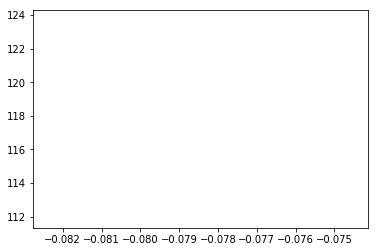

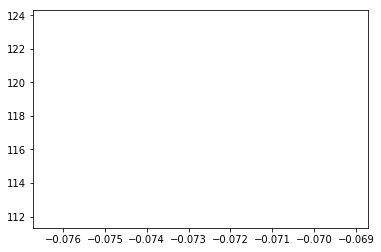

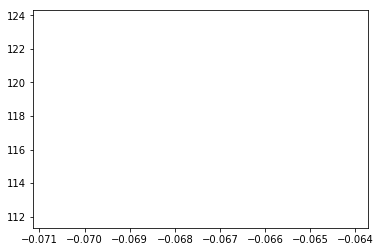

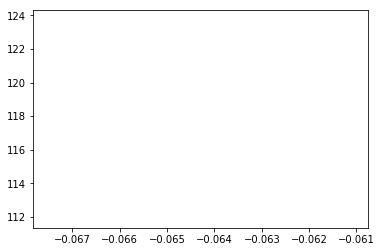

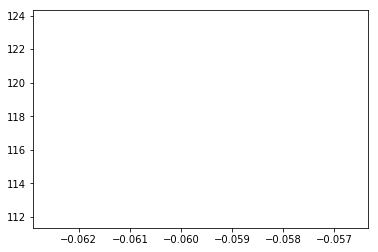

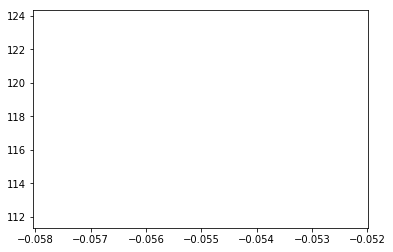

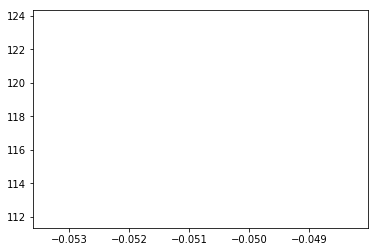

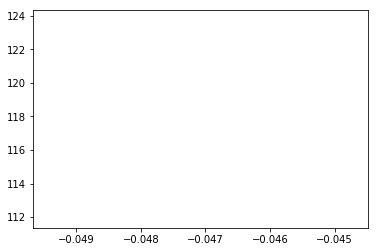

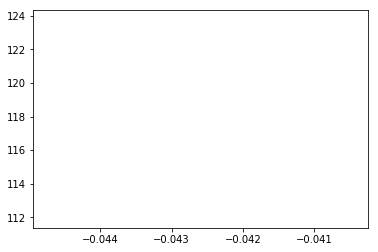

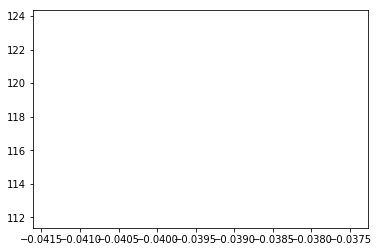

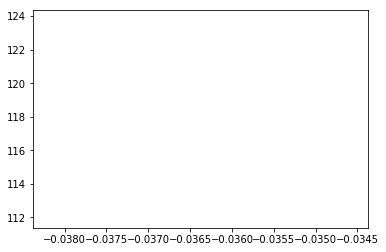

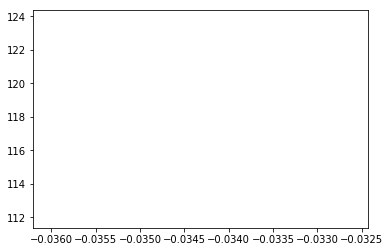

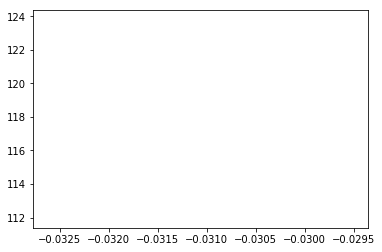

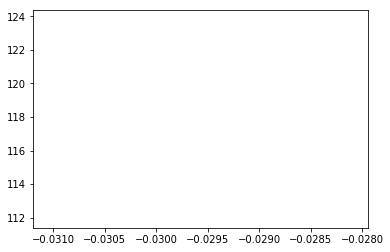

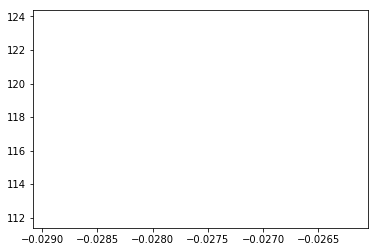

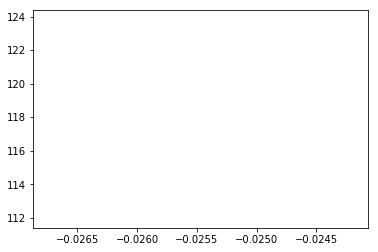

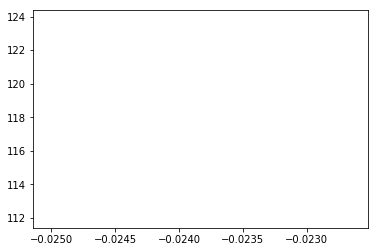

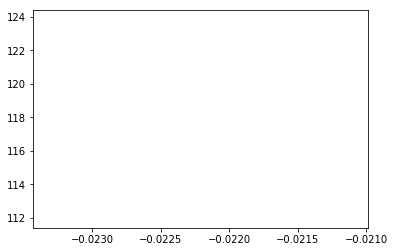

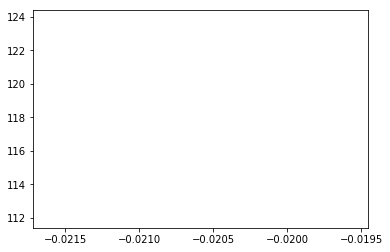

KeyboardInterrupt: 

In [31]:
traj_x = big['D'][0:200, 0]
traj_y = big['D'][0:200, 1]
for i in range(200):
    plt.plot(traj_x[i], traj_y[i])
    time.sleep(0.2)

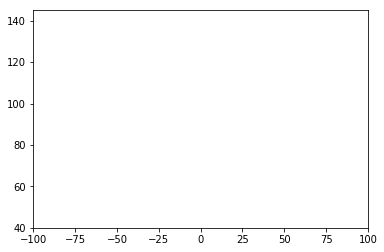

In [37]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( -100, 100))
ax.set_ylim((40, 145))

line, = ax.plot([], [], lw=2)


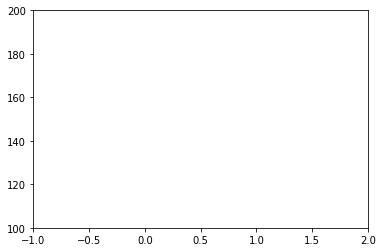

In [42]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( -1, 2))
ax.set_ylim((100, 200))

line, = ax.plot([], [], lw=2)


In [43]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

In [44]:
# animation function. This is called sequentially
def animate(i):
    x = big['D'][i,0] #np.linspace(0, 2, 1000)
    y = big['D'][i,1] #        # np.sin(2 * np.pi * (x - 0.01 * i)) 
    line.set_data(np.array([x]), np.array([y])) 
    return (line,)

In [45]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)  

In [46]:
anim.save('colour_rotation.gif', dpi=80, writer='imagemagick')
plt.close() 